In [ ]:
!pip install transformers[torch] tokenizers datasets seqeval[gpu]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16165 sha256=0d636a3c5f94327a9c8005380d176dbe75306022683651f0272e46485e623f73
  St

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from datasets import load_dataset

dataset_de = load_dataset('wikiann', 'de', keep_in_memory=True)
dataset_en = load_dataset('wikiann', 'en', keep_in_memory=True)
dataset_fr = load_dataset('wikiann', 'fr', keep_in_memory=True)
dataset_es = load_dataset('wikiann', 'es', keep_in_memory=True)

dataset_conll = load_dataset('conll2003', keep_in_memory=True)

In [ ]:
id2label_conll = {k:v for k,v in enumerate(dataset_conll['train'].features['ner_tags'].feature.names)}
label2id_conll = {v:k for k,v in enumerate(dataset_conll['train'].features['ner_tags'].feature.names)}

In [ ]:
from datasets import ClassLabel
import datasets

dataset_conll = dataset_conll.map(lambda example: {"ner_tags": [label2id_conll["O"] if id2label_conll[x]=="B-MISC" or id2label_conll[x]=="I-MISC" else x for x in example["ner_tags"]]})#, features=features)
dataset_conll = dataset_conll.cast_column("ner_tags", datasets.Sequence(datasets.ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'])))

Map:   0%|          | 0/14041 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/14041 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/3250 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [ ]:
from datasets import concatenate_datasets, interleave_datasets
dataset_all_train = interleave_datasets([dataset_de["train"], dataset_en["train"], dataset_fr["train"], dataset_es["train"]])
dataset_all_test = interleave_datasets([dataset_de["test"], dataset_en["test"], dataset_fr["test"], dataset_es["test"]])

In [ ]:
dataset_de["train"].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'spans': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
dataset_de["train"].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None),
 'langs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'spans': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
id2label = {k:v for k,v in enumerate(dataset_de['train'].features['ner_tags'].feature.names)}
label2id = {v:k for k,v in enumerate(dataset_de['train'].features['ner_tags'].feature.names)}

In [ ]:
dataset_all_train[3]

{'tokens': ['REDIRECCIÓN', 'Algarrobo', '(', 'Chile', ')'],
 'ner_tags': [0, 5, 6, 6, 6],
 'langs': ['es', 'es', 'es', 'es', 'es'],
 'spans': ['LOC: Algarrobo ( Chile )']}

# RoBERTa-XLM

In [ ]:
from transformers import XLMRobertaTokenizerFast, XLMRobertaForTokenClassification

tokenizer = XLMRobertaTokenizerFast.from_pretrained("xlm-roberta-base")
#tokenizer.do_lower_case = True
model = XLMRobertaForTokenClassification.from_pretrained("xlm-roberta-base", id2label=id2label, label2id=label2id)

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
from torch.utils.data import Dataset, DataLoader

class DataCollator(Dataset):
  def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

  def __getitem__(self, index):
        #start = timer()
        ner_labels = self.data[index]['ner_tags']
        lower_tokens = [tkn.lower() for tkn in self.data[index]['tokens']]
        #end = timer()
        #print(f"Time to access: {end - start}")

        #start_tokenizer = timer()
        encoding = self.tokenizer(lower_tokens,
                             is_split_into_words=True,
                             return_offsets_mapping=True,
                             padding='max_length',
                             truncation=True,
                             max_length=self.max_len)
        tokens = self.tokenizer.tokenize(lower_tokens,
                             is_split_into_words=True,
                             padding='max_length',
                             truncation=True,
                             max_length=self.max_len,
                             add_special_tokens=True)
        #end_tokenizer = timer()
        #print(f"Time to tokenize: {end_tokenizer - start_tokenizer}")

        encoded_labels = np.ones(len(tokens), dtype=int) * -100

        #start_labeling = timer()
        i = 0
        # for idx, tkn in enumerate(tokens):

        #     if not tkn.startswith("##") and encoding["special_tokens_mask"][idx] == 0:
        #         if i >= len(ner_labels):
        #             print(self.data[index]['tokens'])
        #             print(tokens)
        #             print(encoding)
        #         encoded_labels[idx] = ner_labels[i]
        #         i += 1

        for idx, (start, end) in enumerate(encoding["offset_mapping"]):
            if (start == 0 and end != 0) and tokens[idx] != "\u2581":
                #if i >= len(ner_labels):
                    # print(self.data[index]['tokens'])
                    # print(tokens)
                    # print(encoding)
                encoded_labels[idx] = ner_labels[i]
                i += 1
            elif start != 0 and end != 0:
                # we do not label subwords
                pass
                #encoded_labels[idx] = word_labels[i-1]

        item = {key: torch.as_tensor(val) for key, val in encoding.items() if key != "offset_mapping"}
        #end_labeling = timer()
        #print(f"Time to label: {end_labeling - end_labeling}")
        #item = {key: torch.as_tensor(val) for key, val in encoding.items()}

        item['labels'] = torch.as_tensor(encoded_labels)

        return item

  def __len__(self):
        return self.len

In [ ]:
training_set = DataCollator(dataset_all_train, tokenizer, 512)
testing_set = DataCollator(dataset_all_test, tokenizer, 512)

In [ ]:
idx = 0
limit = 30

for token, label in zip(tokenizer.convert_ids_to_tokens(training_set[idx]["input_ids"])[:limit], training_set[idx]["labels"][:limit]):
    print('{0:10}  {1}'.format(token, label))

<s>         -100
▁als        0
▁teil       0
▁der        0
▁savo       5
yer         -100
▁vor        6
al          -100
pen         -100
▁im         0
▁o          0
sten        -100
▁           -100
.           0
</s>        -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100
<pad>       -100


In [ ]:
train_dataloader = DataLoader(training_set, batch_size=16, shuffle=True)
test_dataloader = DataLoader(testing_set, batch_size=16)

test_dataloader_de = DataLoader(DataCollator(dataset_de["test"], tokenizer, 512), batch_size=8)
test_dataloader_en = DataLoader(DataCollator(dataset_en["test"], tokenizer, 512), batch_size=8)
test_dataloader_fr = DataLoader(DataCollator(dataset_fr["test"], tokenizer, 512), batch_size=8)
test_dataloader_es = DataLoader(DataCollator(dataset_es["test"], tokenizer, 512), batch_size=8)

test_dataloader_conll = DataLoader(DataCollator(dataset_conll["test"], tokenizer, 512), batch_size=16)

country_dict = {
    "all": test_dataloader,
    "de": test_dataloader_de,
    "en": test_dataloader_en,
    "fr": test_dataloader_fr,
    "es": test_dataloader_es,
    "conLL": test_dataloader_conll,
}

In [ ]:
batch = next(iter(test_dataloader_de))

for k,v in batch.items():
  print(k, v.shape)

input_ids torch.Size([8, 512])
attention_mask torch.Size([8, 512])
labels torch.Size([8, 512])


In [ ]:
model.to(device)

XLMRobertaForTokenClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bi

In [ ]:
epochs = 2
batch_size = 16
lr = 5e-5

In [ ]:
from transformers import TrainingArguments
from transformers import Trainer

args = TrainingArguments(
    output_dir="ner-xlm-roberta-geocite",
    overwrite_output_dir=True,
    num_train_epochs=epochs,
    warmup_ratio=0.1,
    # fp16=True,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=1,
    learning_rate=lr,
    save_steps=5000,
    remove_unused_columns=False,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=training_set,
    tokenizer=tokenizer,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a XLMRobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.881600
1000,0.403200
1500,0.374100
2000,0.316800
2500,0.305400
3000,0.272300
3500,0.268700
4000,0.252300
4500,0.251100
5000,0.240000


TrainOutput(global_step=10000, training_loss=0.26737712631225585, metrics={'train_runtime': 14757.9075, 'train_samples_per_second': 10.842, 'train_steps_per_second': 0.678, 'total_flos': 4.180937097216e+16, 'train_loss': 0.26737712631225585, 'epoch': 2.0})

# Evaluation

In [ ]:
from sklearn.metrics import f1_score
from seqeval.metrics import classification_report, performance_measure
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def valid(model, code):
    model.eval()

    testing_loader = country_dict[code]

    eval_loss, eval_f1 = 0, 0
    nb_eval_examples, nb_eval_steps = 0, 0
    eval_preds, eval_labels = [], []

    with torch.no_grad():
        for idx, batch in enumerate(testing_loader):

            ids = batch['input_ids'].to(device, dtype = torch.long)
            mask = batch['attention_mask'].to(device, dtype = torch.long)
            labels = batch['labels'].to(device, dtype = torch.long)
            #labels_ref = batch['labels_ref'].to(device, dtype = torch.long)

            output = model(input_ids=ids, attention_mask=mask, labels=labels)
            eval_logits = output[1]
            #eval_logits_ref = output[1][1]
            loss = output[0]

            eval_loss += loss.item()

            nb_eval_steps += 1
            nb_eval_examples += labels.size(0)

            if idx % 100==0:
                loss_step = eval_loss/nb_eval_steps
                print(f"Validation loss per 100 evaluation steps: {loss_step}")

            flattened_targets = labels.view(-1)
            #flattened_targets_ref = labels_ref.view(-1)
            active_logits = eval_logits.view(-1, len(id2label))
            #active_logits_ref = eval_logits_ref.view(-1, len(id2label_ref))
            flattened_predictions = torch.argmax(active_logits, axis=1)
            #flattened_predictions_ref = torch.argmax(active_logits_ref, axis=1) # shape (batch_size * seq_len,)

            # only compute accuracy at active labels
            active_accuracy = labels.view(-1) != -100 # shape (batch_size, seq_len)
            #active_accuracy_ref = labels_ref.view(-1) != -100 # shape (batch_size, seq_len)

            labels = torch.masked_select(flattened_targets, active_accuracy)
            #labels_ref = torch.masked_select(flattened_targets_ref, active_accuracy_ref)
            predictions = torch.masked_select(flattened_predictions, active_accuracy)
            #predictions_ref = torch.masked_select(flattened_predictions_ref, active_accuracy_ref)

            eval_labels.append(labels)
            #eval_labels_ref.append(labels_ref)
            eval_preds.append(predictions)
            #eval_preds_ref.append(predictions_ref)

            eval_f1 += f1_score(labels.cpu().numpy(), predictions.cpu().numpy(), average='micro')
            #eval_f1_ref += f1_score(labels_ref.cpu().numpy(), predictions_ref.cpu().numpy(), average='micro')

    labels = []
    for l in eval_labels:
        inner_l = []
        for j in l:
            inner_l.append(id2label[j.item()])
        labels.append(inner_l)
    predictions = []
    for l in eval_preds:
        inner_l = []
        for j in l:
            inner_l.append(id2label[j.item()])
        predictions.append(inner_l)

    # labels_ref = []
    # for l in eval_labels_ref:
    #     inner_l = []
    #     for j in l:
    #         inner_l.append(id2label_ref[j.item()])
    #     labels_ref.append(inner_l)
    # predictions_ref = []
    # for l in eval_preds_ref:
    #     inner_l = []
    #     for j in l:
    #         inner_l.append(id2label_ref[j.item()])
    #     predictions_ref.append(inner_l)
    #labels = [[id2label[j.item()] for j in id] id in eval_labels]
    #labels = [id2label[id.item()] for id in eval_labels]
    #predictions = [id2label[id.item()] for id in eval_preds]

    eval_loss = eval_loss / nb_eval_steps
    eval_f1 = eval_f1 / nb_eval_steps
    #eval_f1_ref = eval_f1_ref / nb_eval_steps
    print(f"Validation Loss: {eval_loss}")
    print(f"Validation F1 Segmentation: {eval_f1}")
    #print(f"Validation F1 Ref Seg: {eval_f1_ref}")

    return labels, predictions

In [ ]:
results = {}

for country, loader in country_dict.items():
    labels, predictions = valid(model, country)
    results[f"{country}_labels"] = labels
    results[f"{country}_predictions"] = predictions

Validation loss per 100 evaluation steps: 0.039676930755376816
Validation loss per 100 evaluation steps: 0.17036356276251596
Validation loss per 100 evaluation steps: 0.17994861636514686
Validation loss per 100 evaluation steps: 0.1820803678894657
Validation loss per 100 evaluation steps: 0.18359291433656305
Validation loss per 100 evaluation steps: 0.18777998102022087
Validation loss per 100 evaluation steps: 0.18748430919038525
Validation loss per 100 evaluation steps: 0.1904380378378462
Validation loss per 100 evaluation steps: 0.18893126758878187
Validation loss per 100 evaluation steps: 0.18764461597611717
Validation loss per 100 evaluation steps: 0.18973487876374256
Validation loss per 100 evaluation steps: 0.19015894852558338
Validation loss per 100 evaluation steps: 0.18849745982456068
Validation loss per 100 evaluation steps: 0.18800144333916385
Validation loss per 100 evaluation steps: 0.188922752238023
Validation loss per 100 evaluation steps: 0.18828791082352103
Validation 

In [ ]:
print(classification_report(results["de_labels"], results["de_predictions"]))

              precision    recall  f1-score   support

         LOC       0.85      0.87      0.86      4961
         ORG       0.77      0.78      0.78      4157
         PER       0.92      0.90      0.91      4750

   micro avg       0.85      0.86      0.85     13868
   macro avg       0.84      0.85      0.85     13868
weighted avg       0.85      0.86      0.85     13868



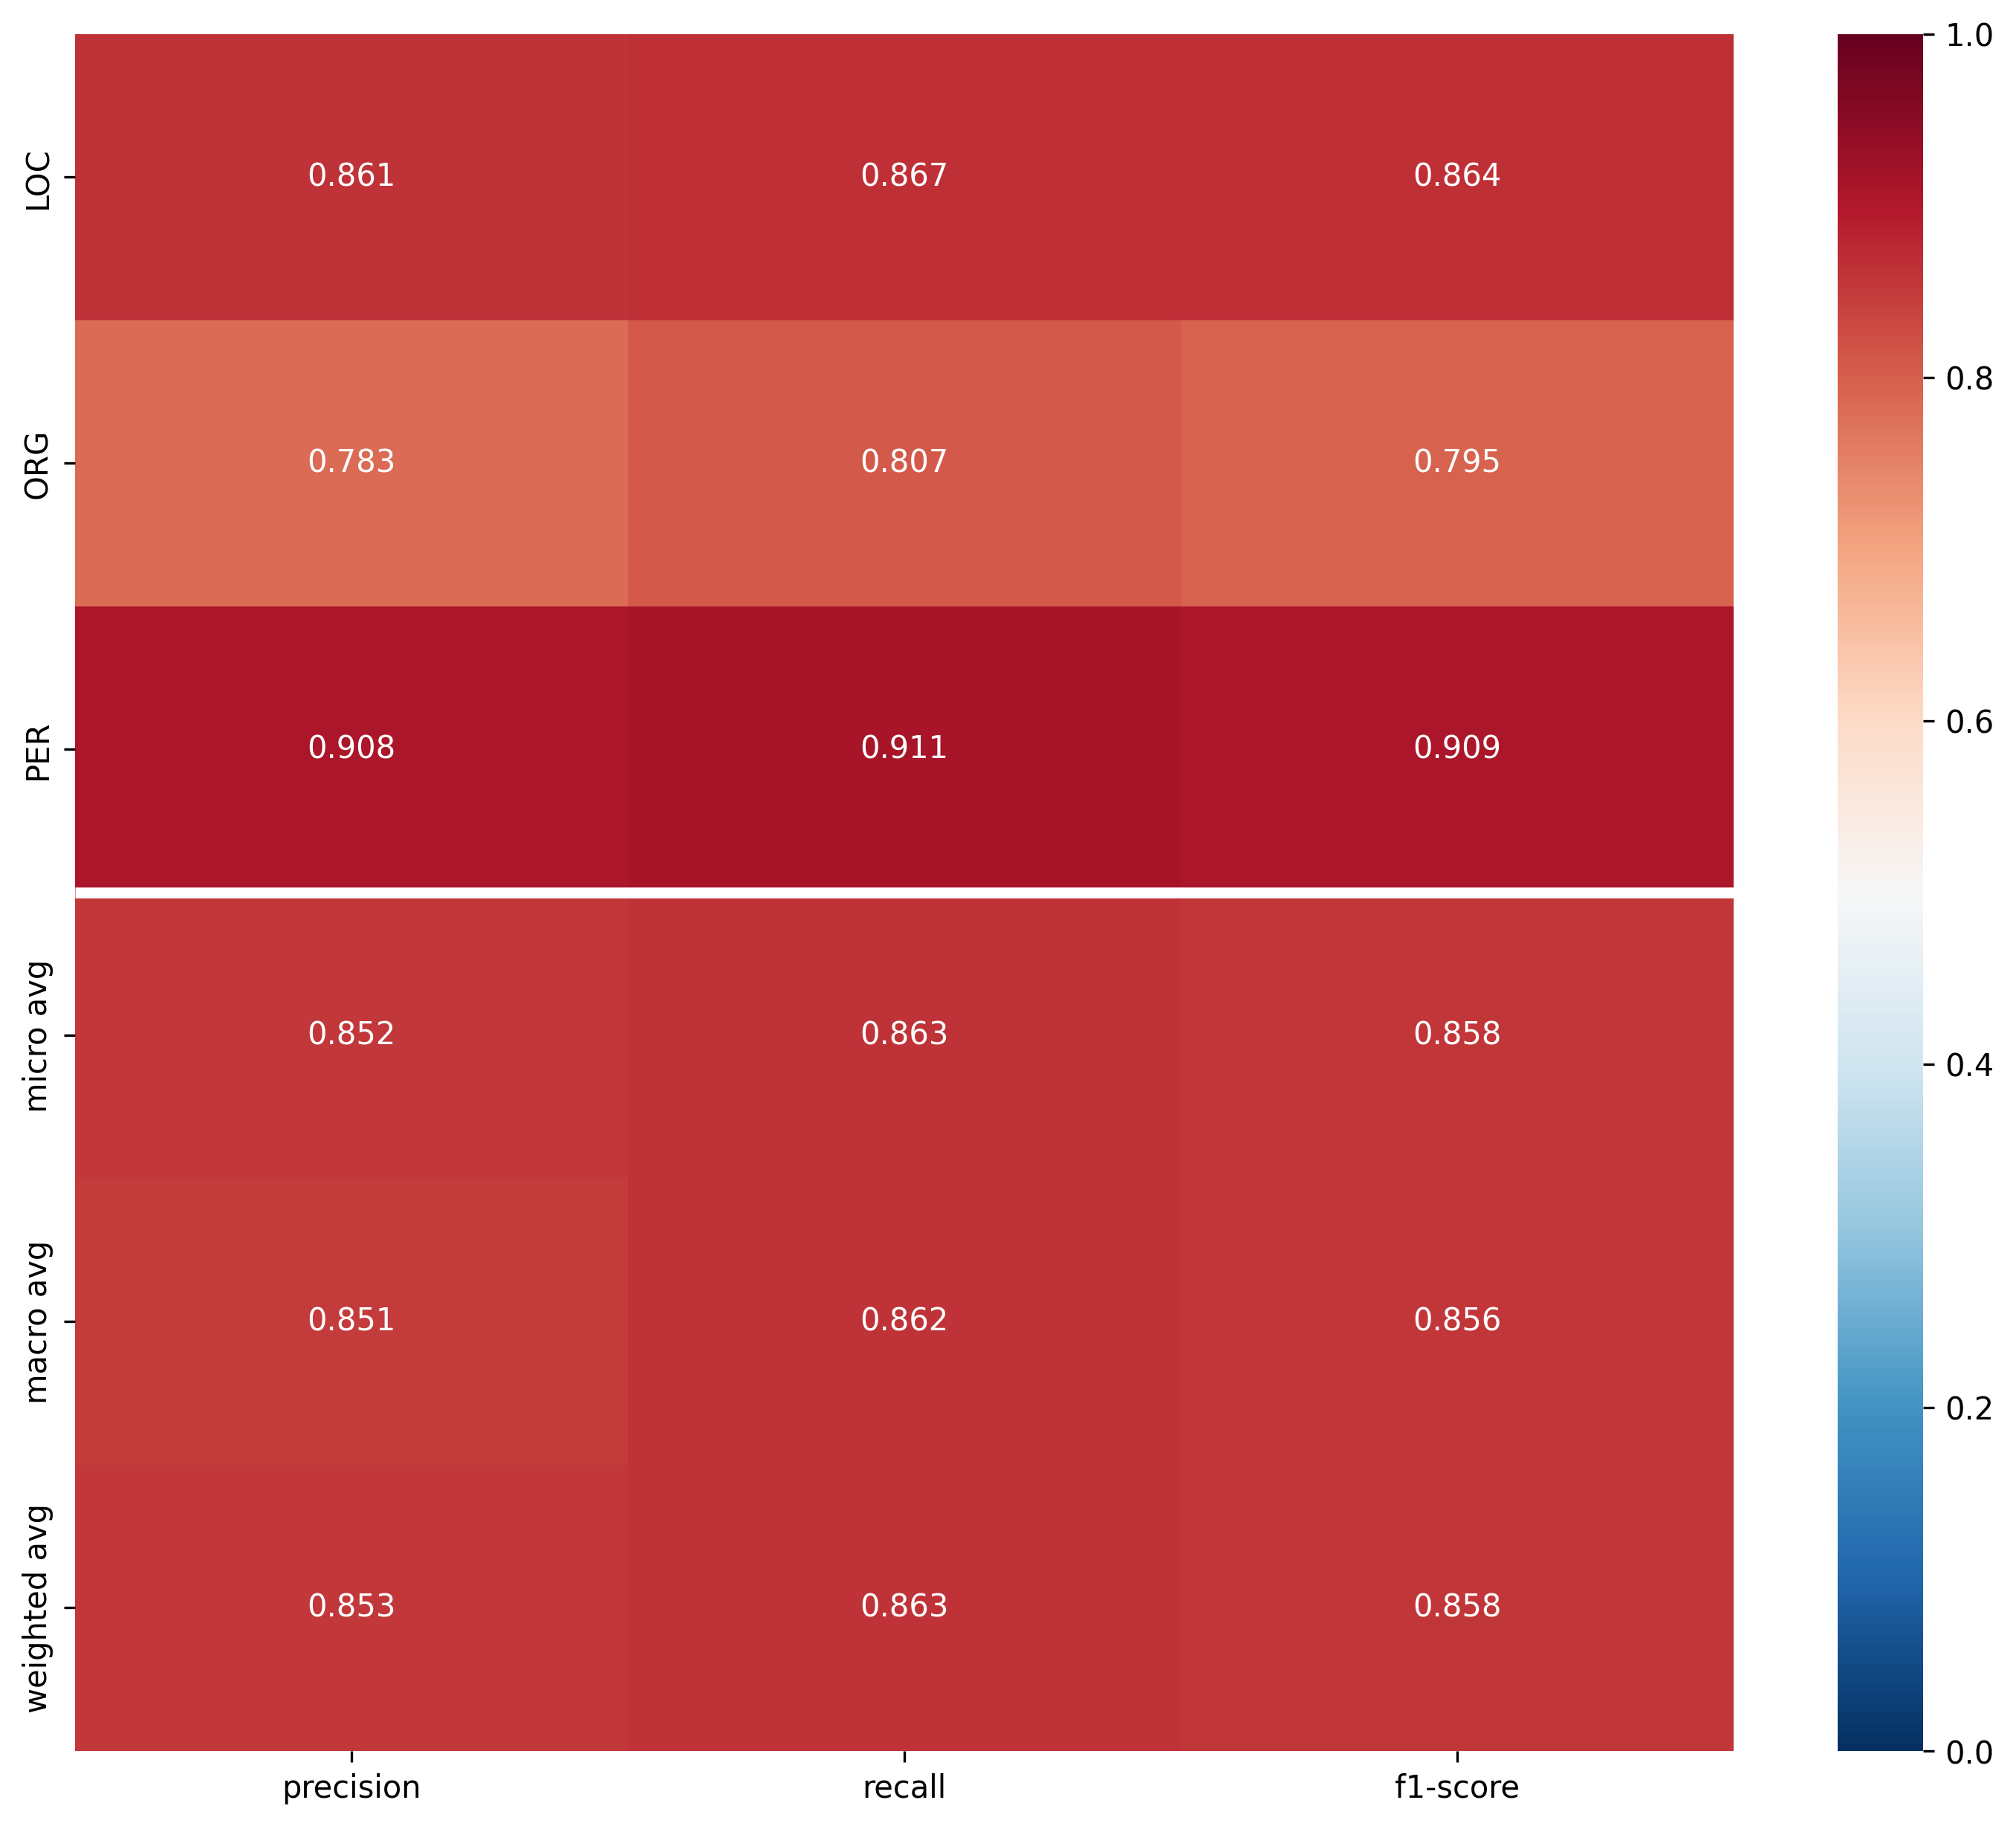

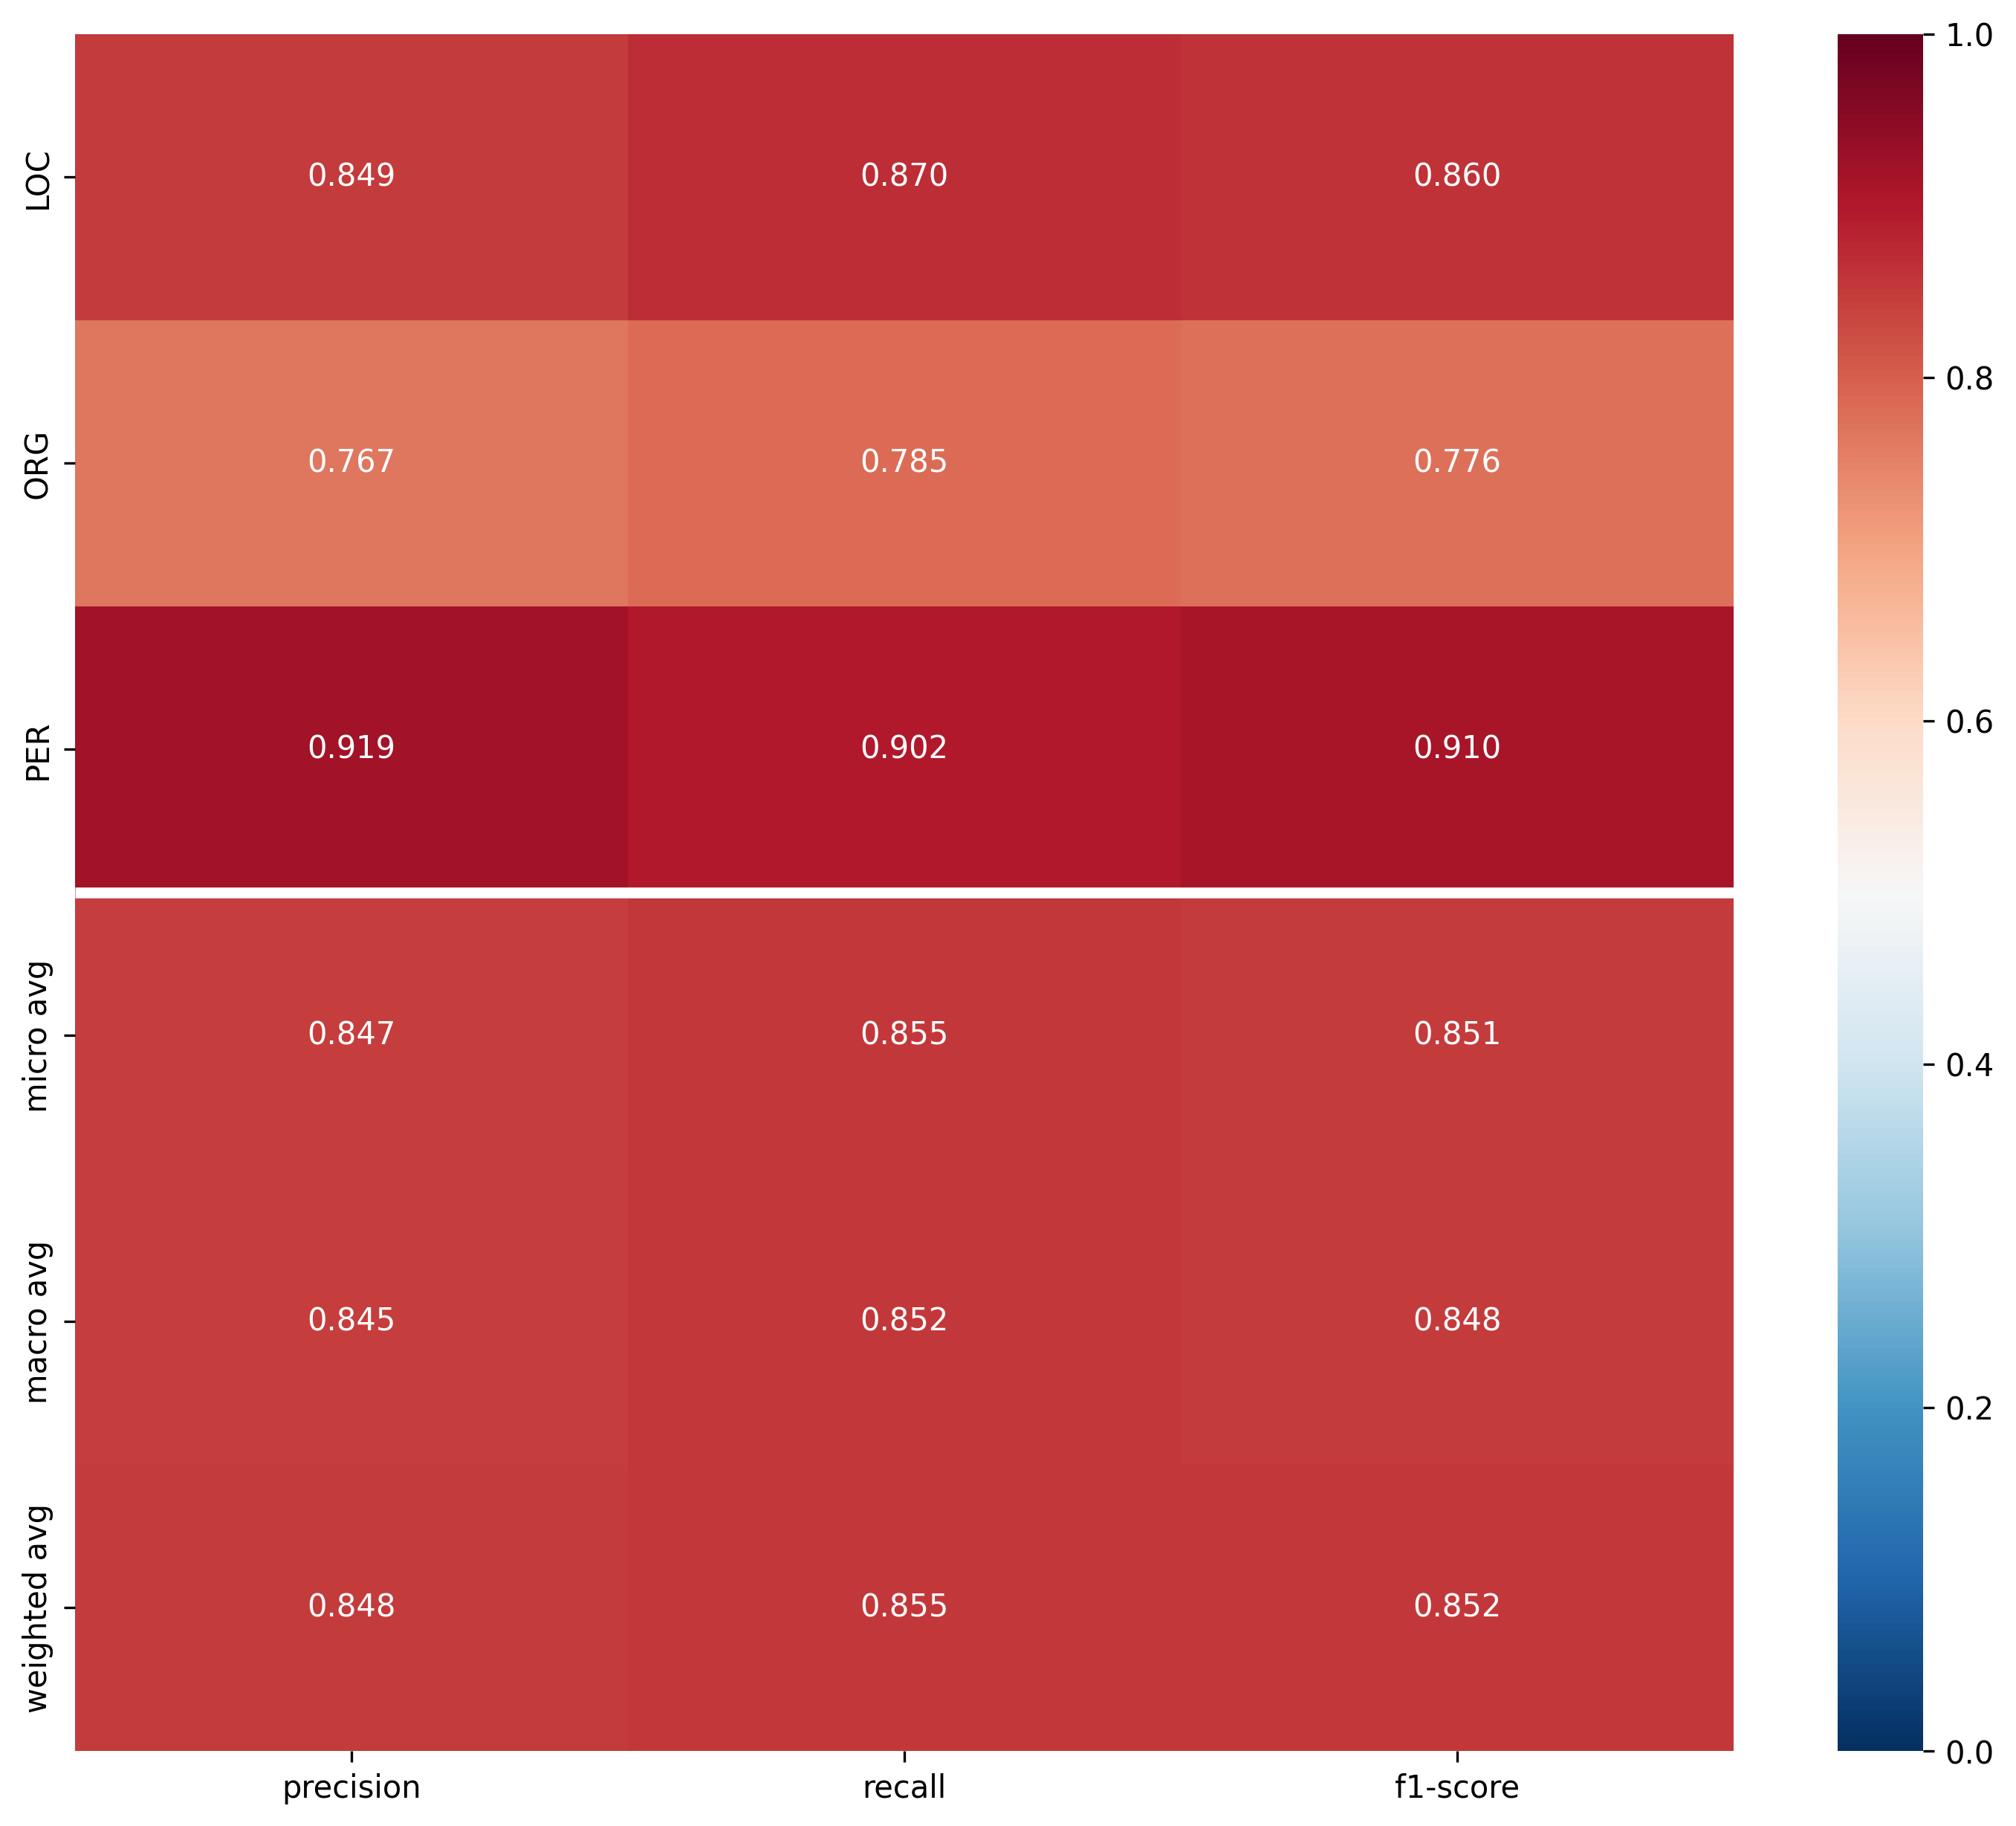

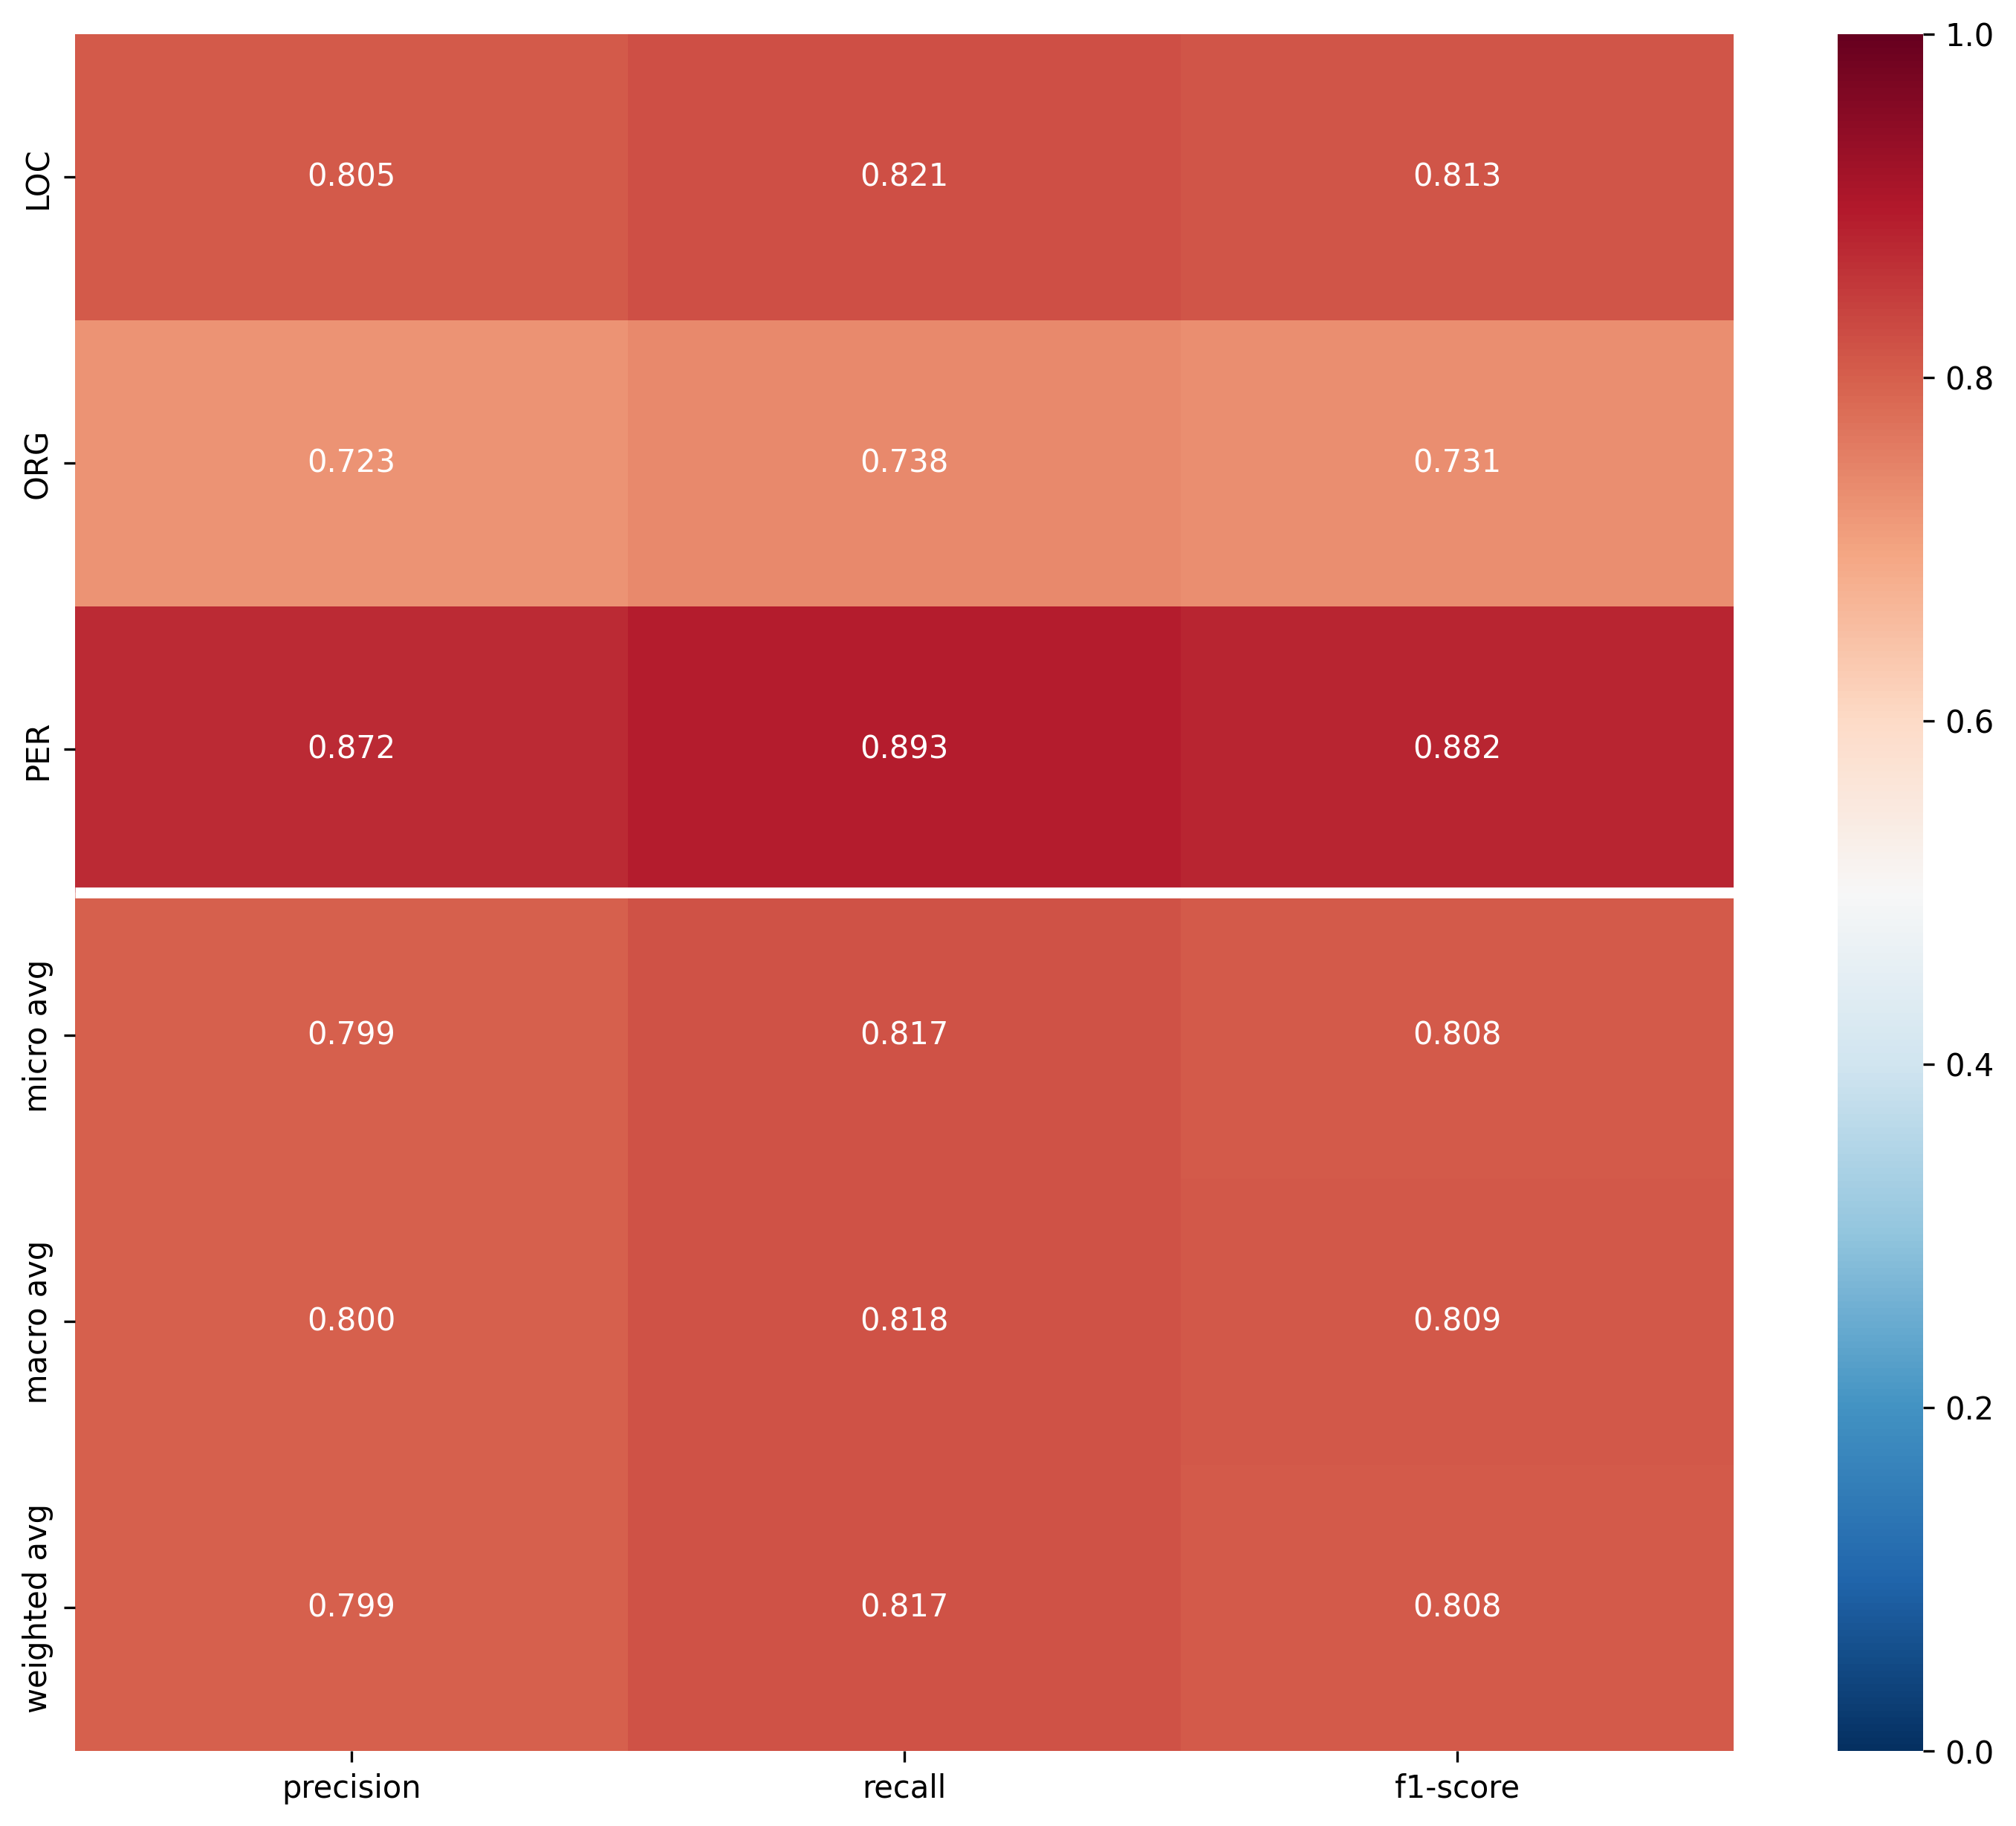

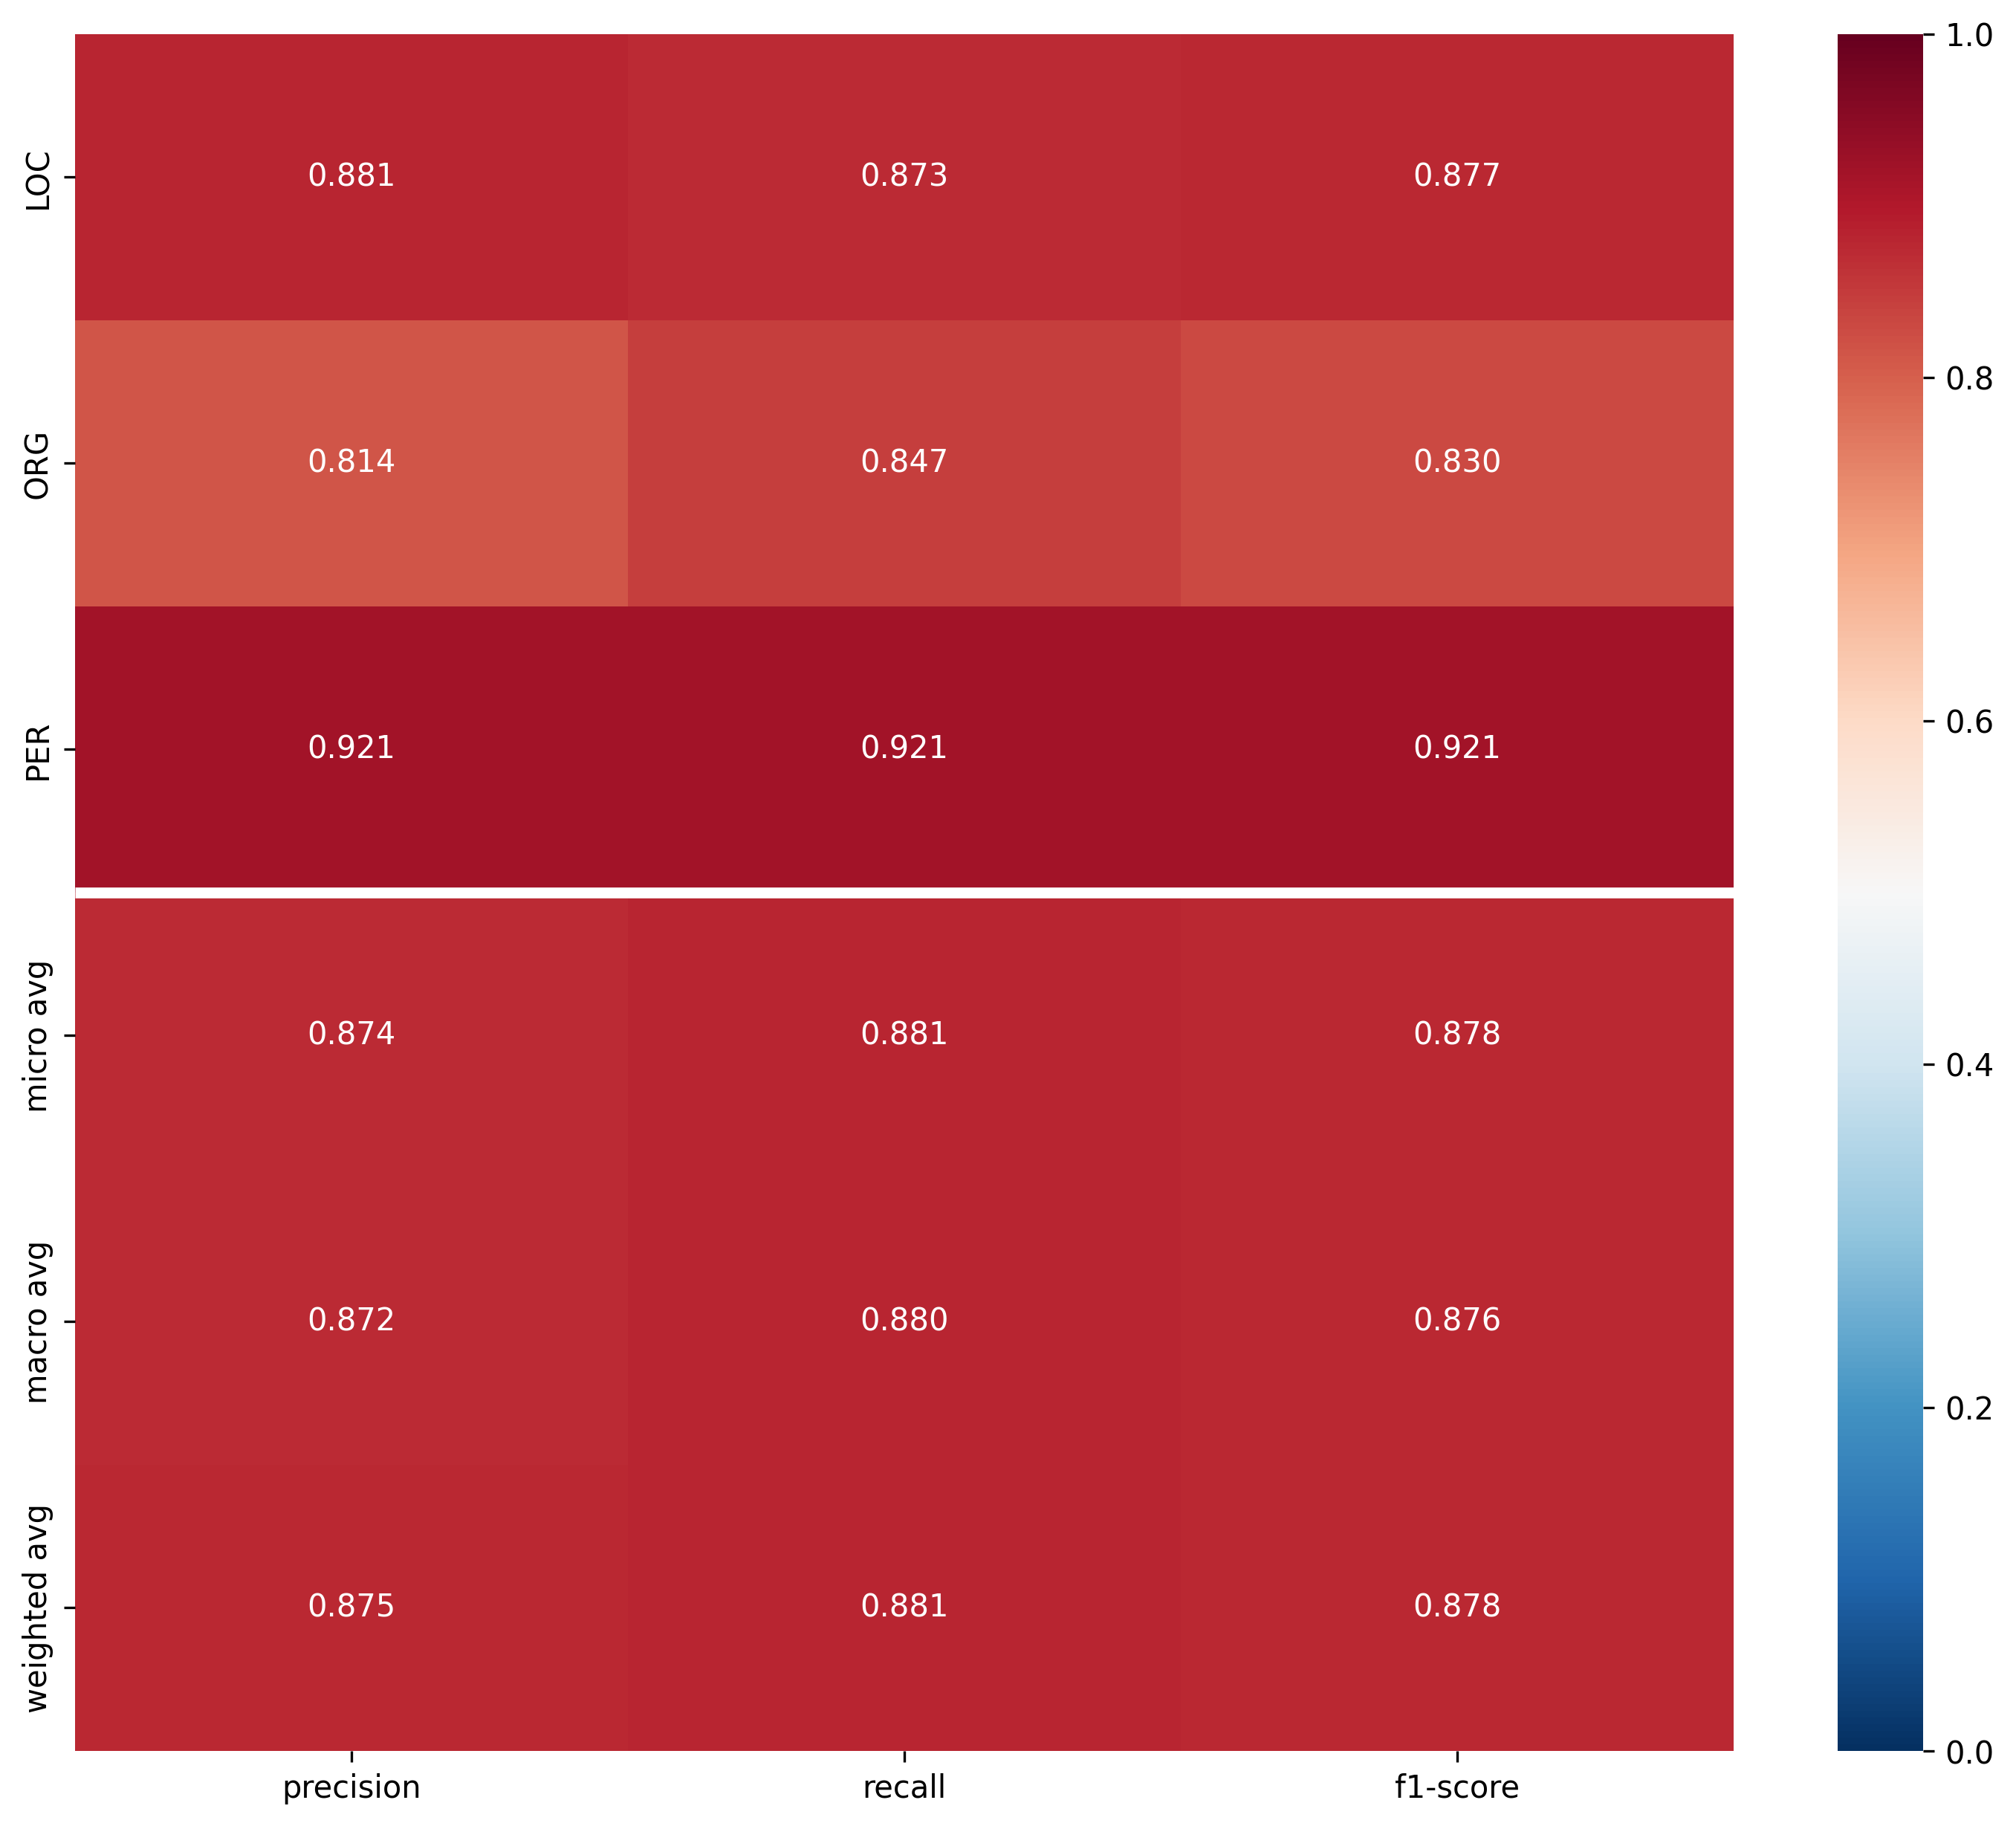

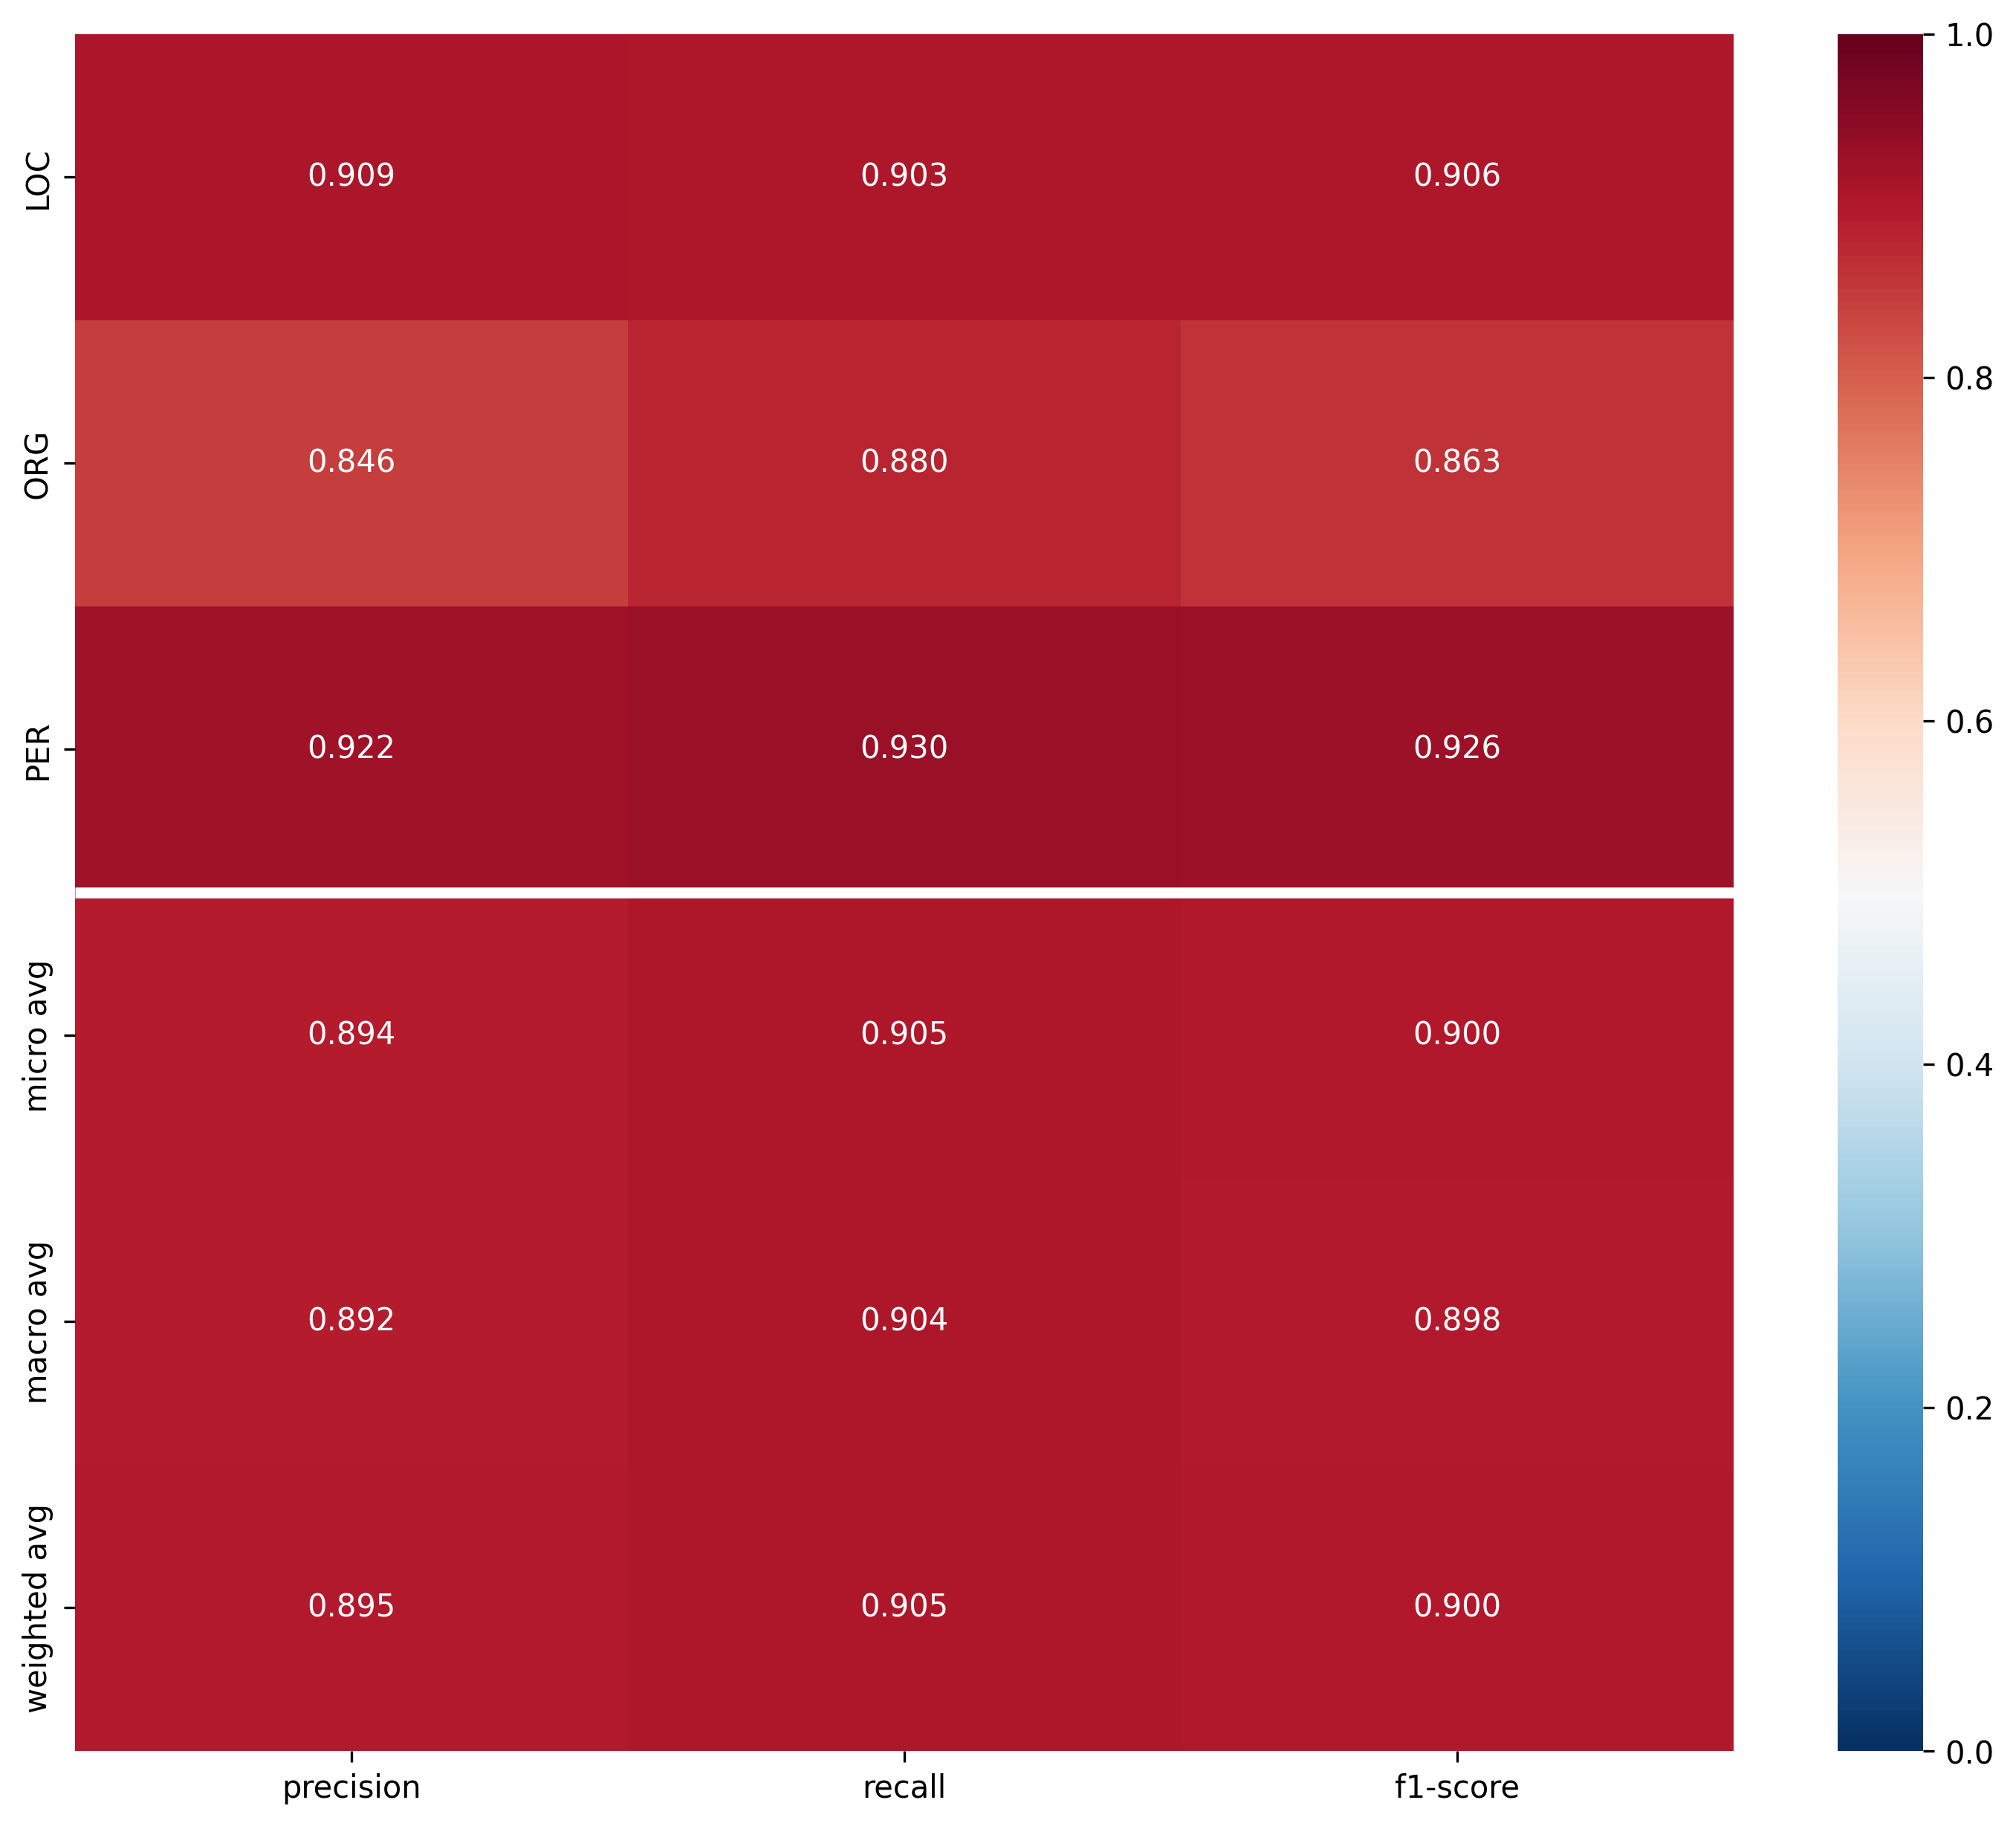

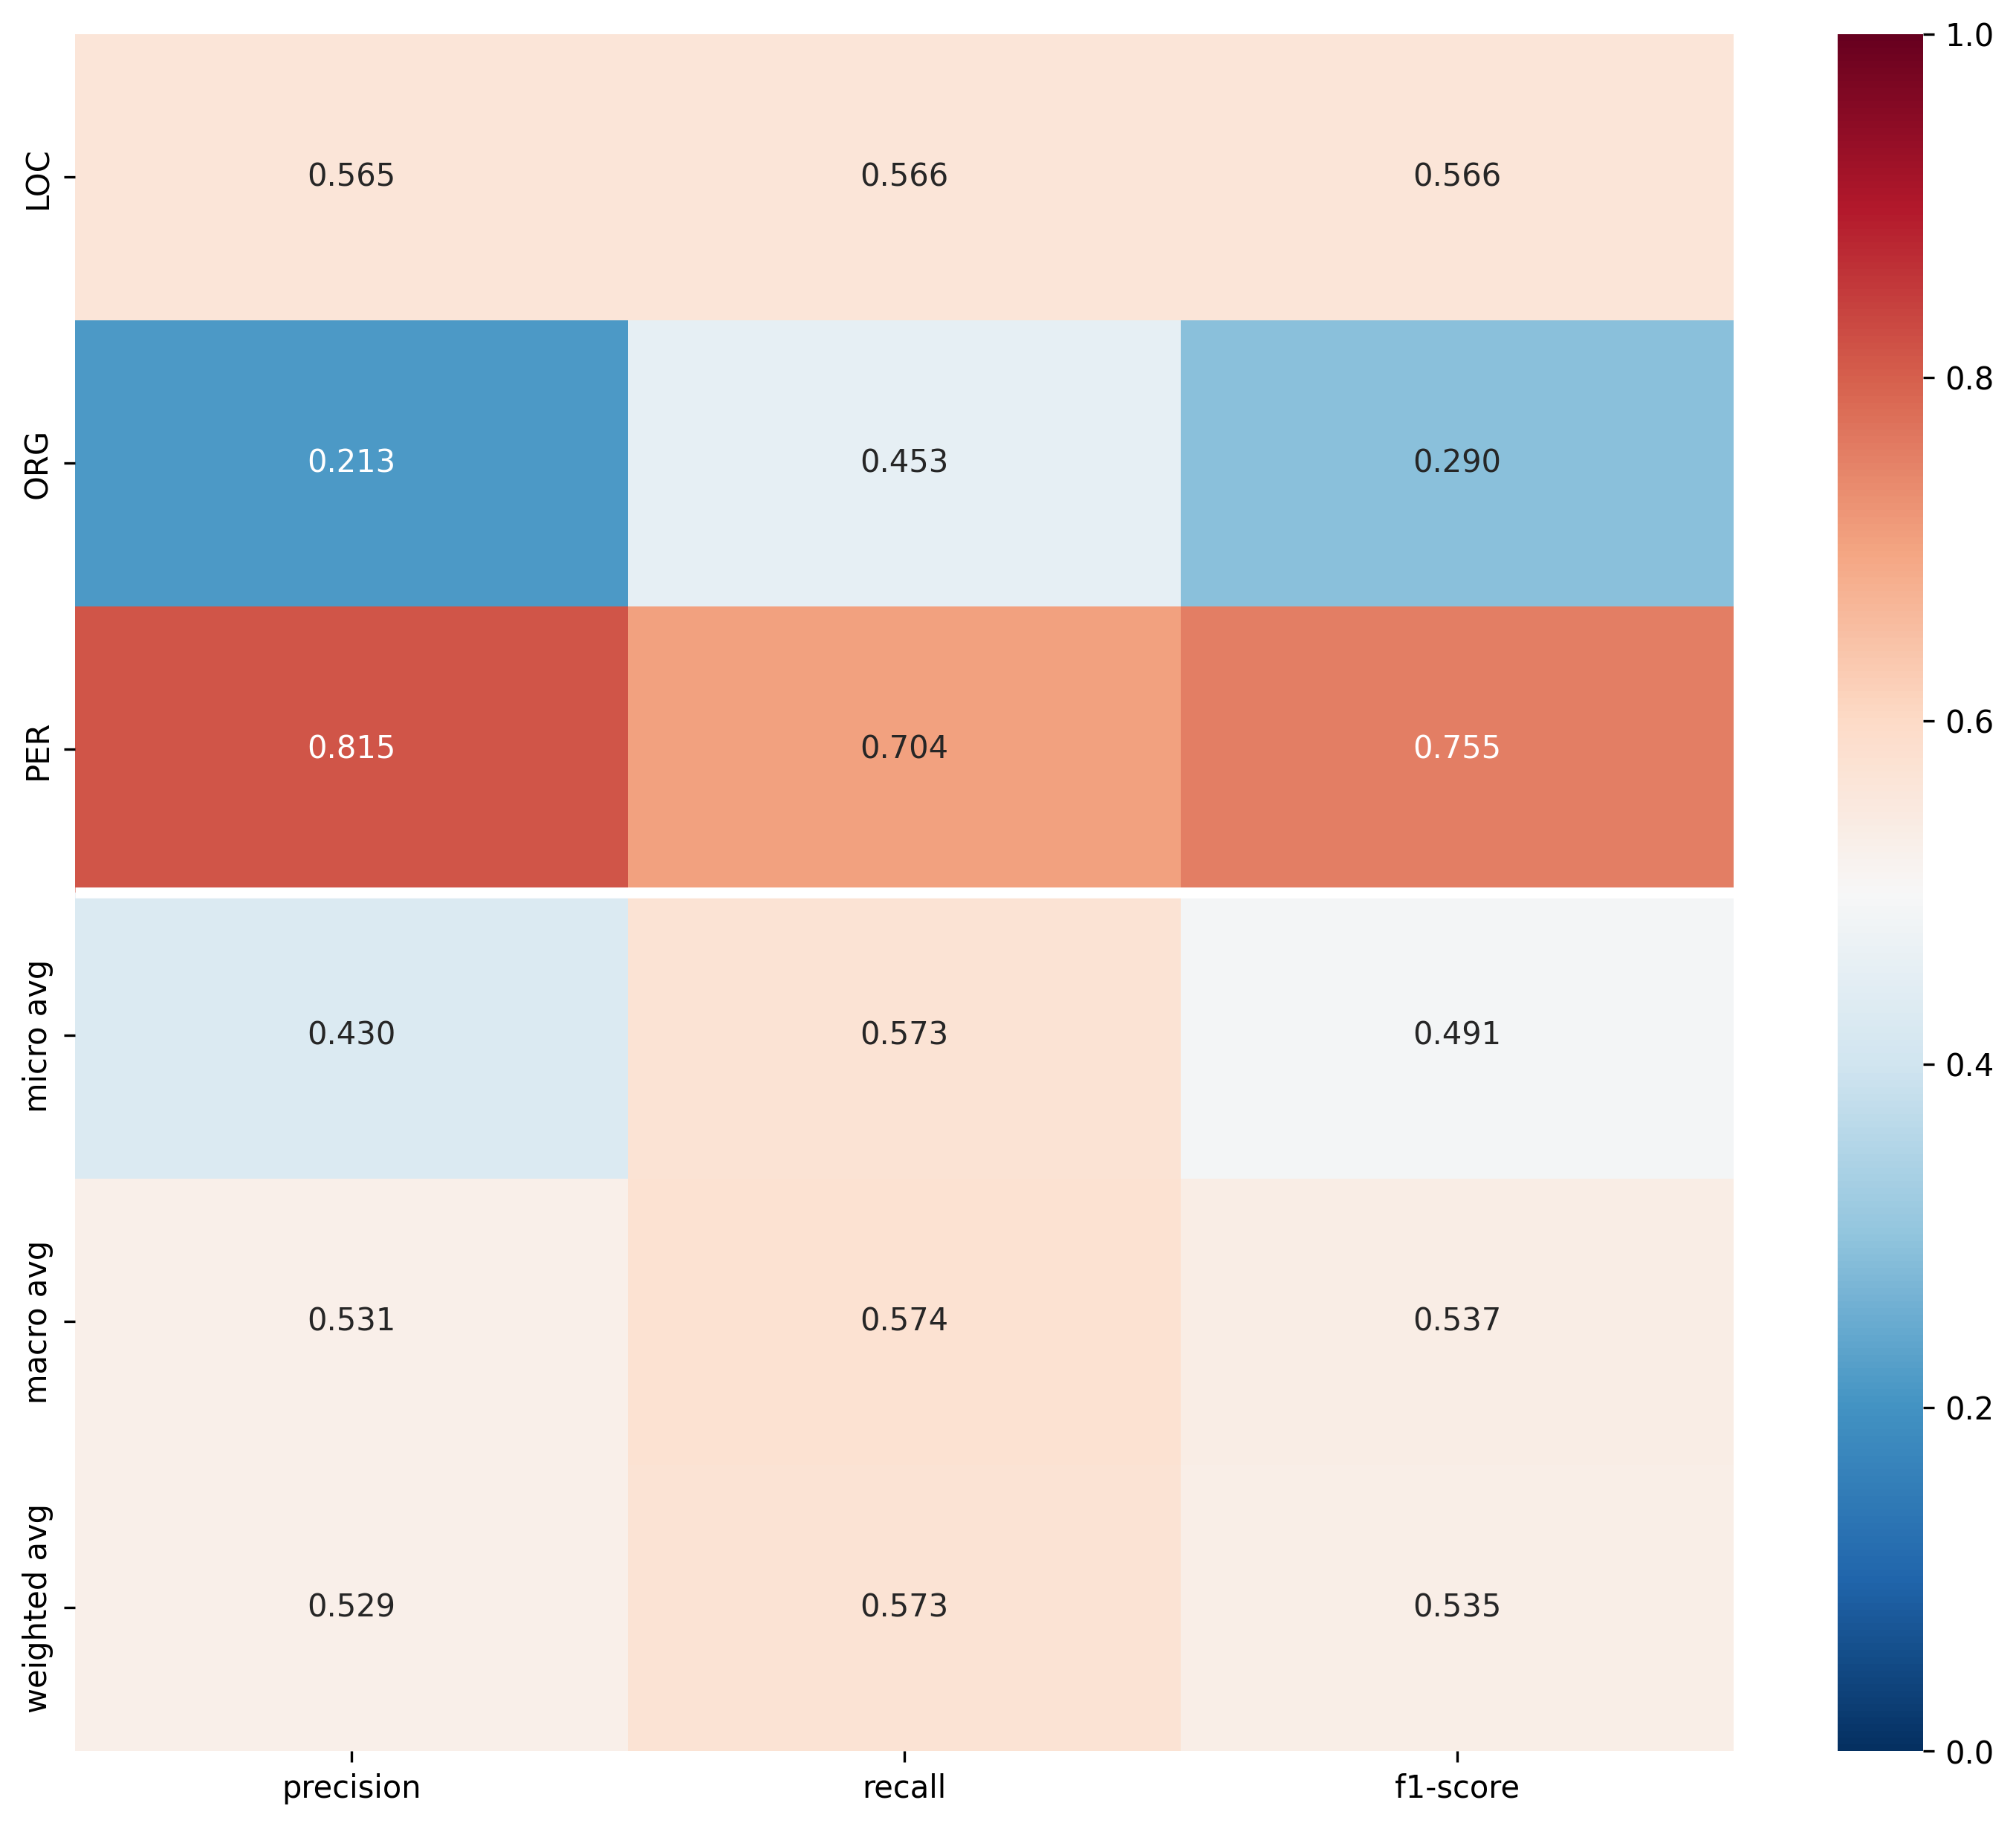

In [ ]:
for country in country_dict.keys():
    report = classification_report(results[f"{country}_labels"], results[f"{country}_predictions"], output_dict=True)
    df_cr = pd.DataFrame(report)
    fig, ax = plt.subplots(figsize=(12,10), dpi=300)
    sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
    ax.hlines([3], *ax.get_xlim(), colors="white", linewidths = 3.5)
    #print(f"Plotting evaluation for '{key}'.")
    fig.show()
    fig.savefig("ner_roberta_xlm_" + country + "_cls_report"+ ".png")